# DOPPIA FENDITURA

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from mylib import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'fenditura2.csv'
fr = pd.read_csv(FILE)

In [3]:
θ = np.array(fr['angolo (°)'])
sigmaθ = np.pi/180 * np.ones_like(θ) 
V = np.array(fr['V (mV)']) * 10**-3
sigmaV = np.array(fr['sigmaV (mV)']) * 10**-3

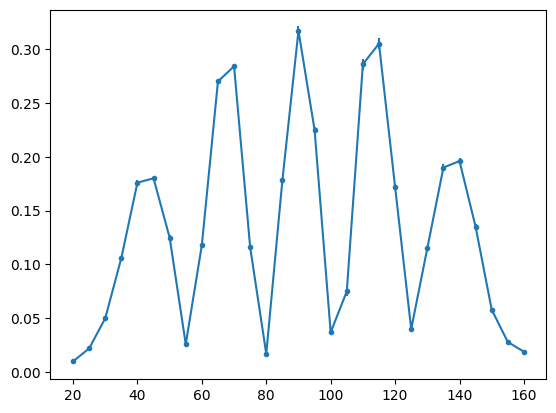

In [4]:
plt.errorbar(θ,V,yerr=sigmaV,fmt='.-',label='data')
plt.show()

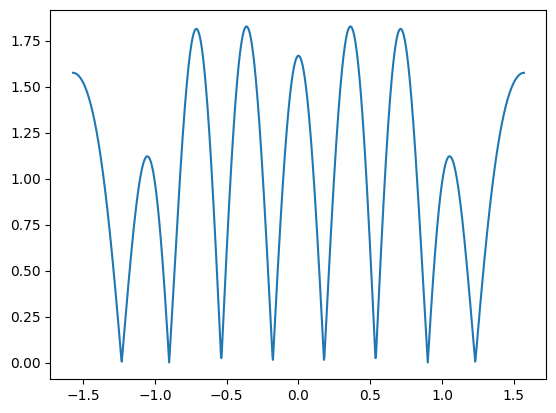

In [6]:
def interferenza(θ,R,d,k): # somma campi E1,E2
    r1 = jnp.sqrt((R*jnp.sin(θ)-d/2)**2 + (R*jnp.cos(θ))**2)
    r2 = jnp.sqrt((R*jnp.sin(θ)+d/2)**2 + (R*jnp.cos(θ))**2)
    # print(r1,r2)
    
    E1 = jnp.cos(k*r1)/r1
    E2 = jnp.cos(k*r2)/r2
    
    # print(E1,E2)
    # return R*jnp.sin(k*θ)/θ
    return jnp.abs(E1 + E2)

x = np.linspace(-np.pi/2,np.pi/2,1000)
y = interferenza(x,1,1,20)

plt.plot(x,y)
    